# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset? -1 hour
- How are the predictor variables related to the outcome variable? - Glucose is positively correlated.
- What is the correlation between the predictor variables? There appear to be 3 variables positively correlated to one another. Age/Pregnancies, Glucose/Insulin, and SkinThickness/BMI
- What is the distribution of each predictor variable? boxplots, histograms, describe function
- Are there any outliers in the predictor variables? boxplots
- How are the predictor variables related to each other? heatmap
- Is there any interaction effect between the predictor variables? scatterplot
- What is the average age of the individuals in the dataset? - 33.2 years old.
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)? No gender information is available.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 rows of numeric data, which contains no null values. 
*However, there are nonsensical '0' values that must be accounted for.*
We need to replace 0 in Glucose, BloodPressure,SkinThickness,Insulin,and BMI.
-This has taken me 30 minutes, for the powers that be, out of 200 minutes allocated for this task. I needed to clone the github folder, start up jupyterlab, pull in the dataset, then it took some time to figure out how to get the mean from a variable while excluding zero values as below, which is still untested code that might take more time to implement, as it looks a little too 'SQLy' to work. I have doubts.-
I need to find the means and medians for all the variables as a starting point. Also, before replacing any values, it should be confirmed that there are no rows with ALL ZEROS in the independent variables.

In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There's one value for insulin that is 846, and we're going to keep our eye on that as we move through the EDA process. Transformation could smooth it out.

In [69]:
df['Glucose']=df['Glucose'].replace(0,np.nan)
df['Glucose_mv']=df['Glucose'].replace(np.nan,df['Glucose'].mean())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_mv
count,768.000000,763.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,121.686763
std,3.369578,30.535641,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,30.435949
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,44.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,99.750000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,117.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000


This looks like it did what I wanted it to do. Let's do it to the rest of the variables.

In [70]:
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)
df['BloodPressure_mv']=df['BloodPressure'].replace(np.nan,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)
df['SkinThickness_mv']=df['SkinThickness'].replace(np.nan,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,np.nan)
df['Insulin_mv']=df['Insulin'].replace(np.nan,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,np.nan)
df['BMI_mv']=df['BMI'].replace(np.nan,df['BMI'].mean())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_mv,BloodPressure_mv,SkinThickness_mv,Insulin_mv,BMI_mv
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,121.686763,72.405184,29.153420,155.548223,32.457464
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951,30.435949,12.096346,8.790942,85.021108,6.875151
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000,99.750000,64.000000,25.000000,121.500000,27.500000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,117.000000,72.202592,29.153420,155.548223,32.400000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,155.548223,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000


Now let's look at the relationship between these variables.

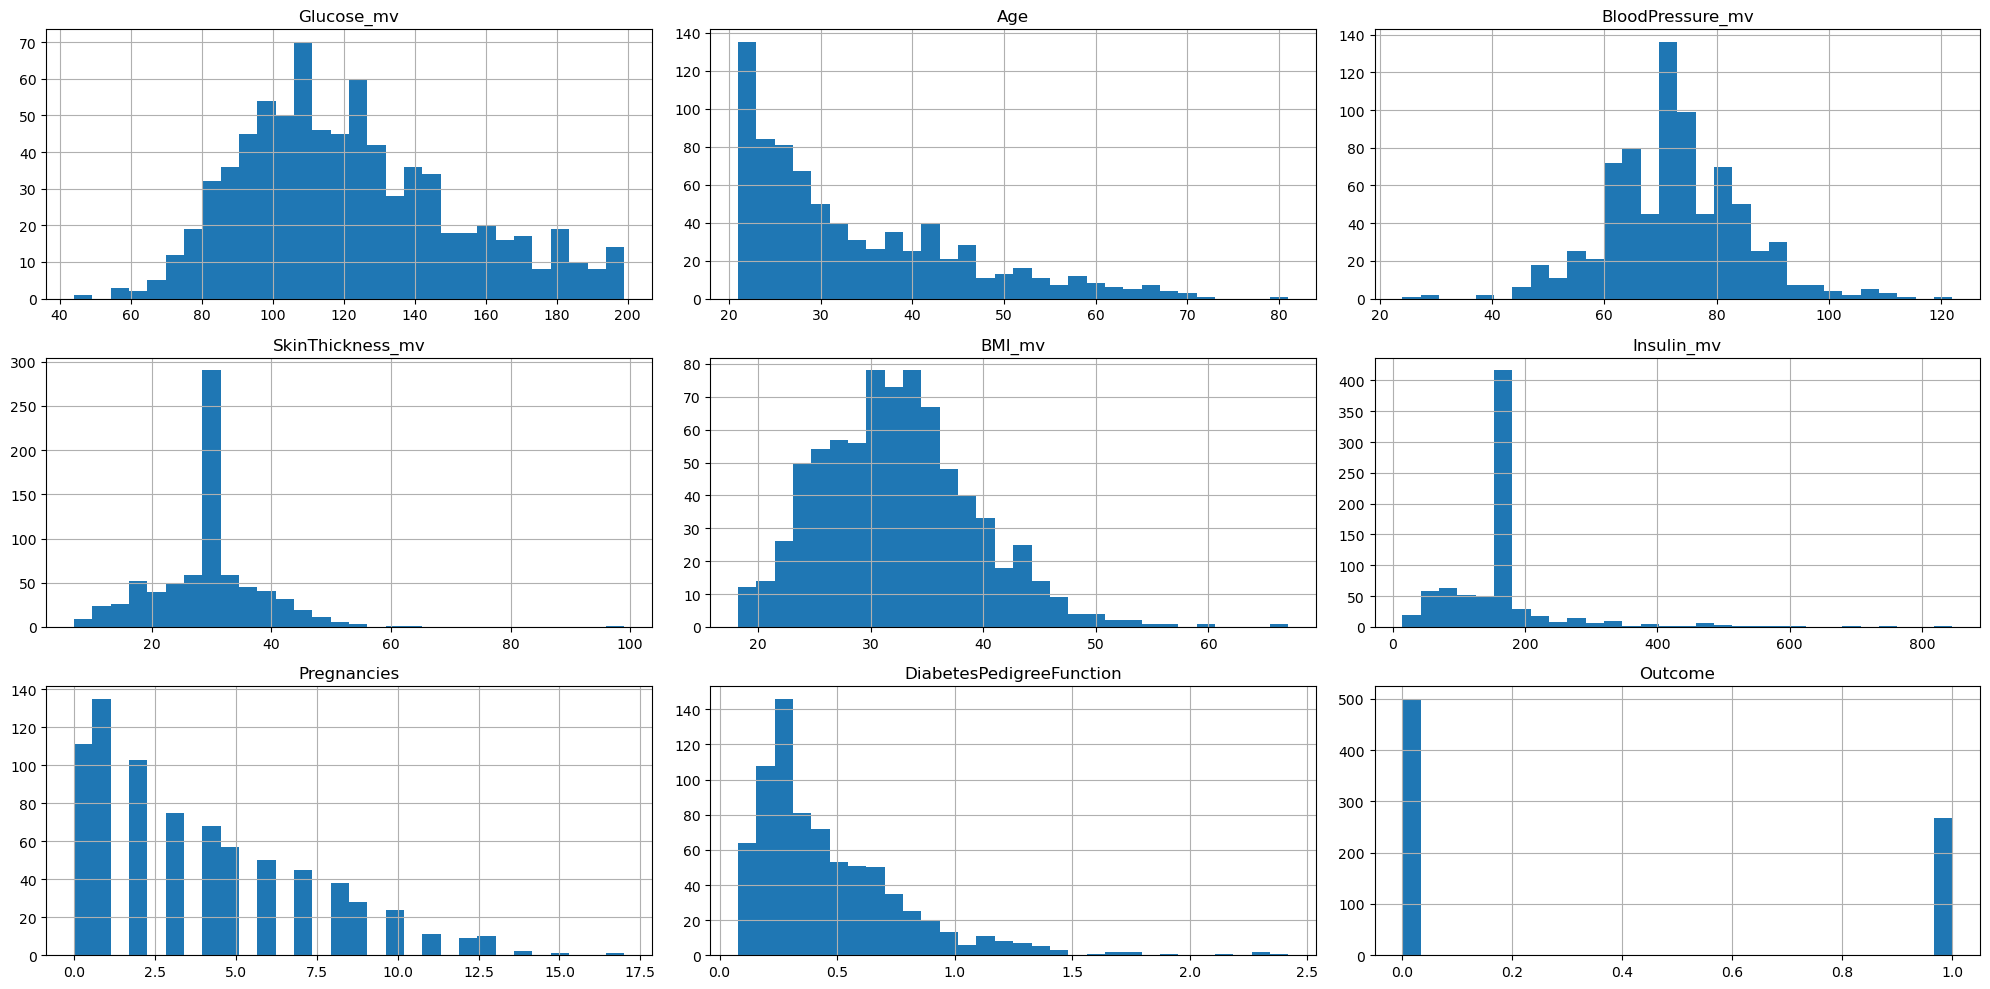

<Figure size 640x480 with 0 Axes>

In [71]:
graphing = df[['Glucose_mv','Age','BloodPressure_mv','SkinThickness_mv','BMI_mv','Insulin_mv','Pregnancies','DiabetesPedigreeFunction','Outcome',]]
graphing.hist(bins=30,figsize=(20, 10))
plt.tight_layout()
plt.show()
plt.savefig('eda_histograms.png')

DiabetesPedigreeFunction, Pregnancies, Insulin, and Age do not look normally distributed. Since they are skewed to the left, lets log transform them.

In [73]:
df['DPFlog']=np.log(df['DiabetesPedigreeFunction'])
df['Insulin_mvlog']=np.log(df['Insulin_mv'])
df['Agelog']=np.log(df['Age'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_mv,BloodPressure_mv,SkinThickness_mv,Insulin_mv,BMI_mv,DPFlog,Insulin_mvlog,Agelog
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.00000,155.548223,33.6,-0.466809,5.046956,3.912023
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.00000,155.548223,26.6,-1.046969,5.046956,3.433987
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,29.15342,155.548223,23.3,-0.397497,5.046956,3.465736
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.00000,94.000000,28.1,-1.789761,4.543295,3.044522
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.00000,168.000000,43.1,0.827678,5.123964,3.496508


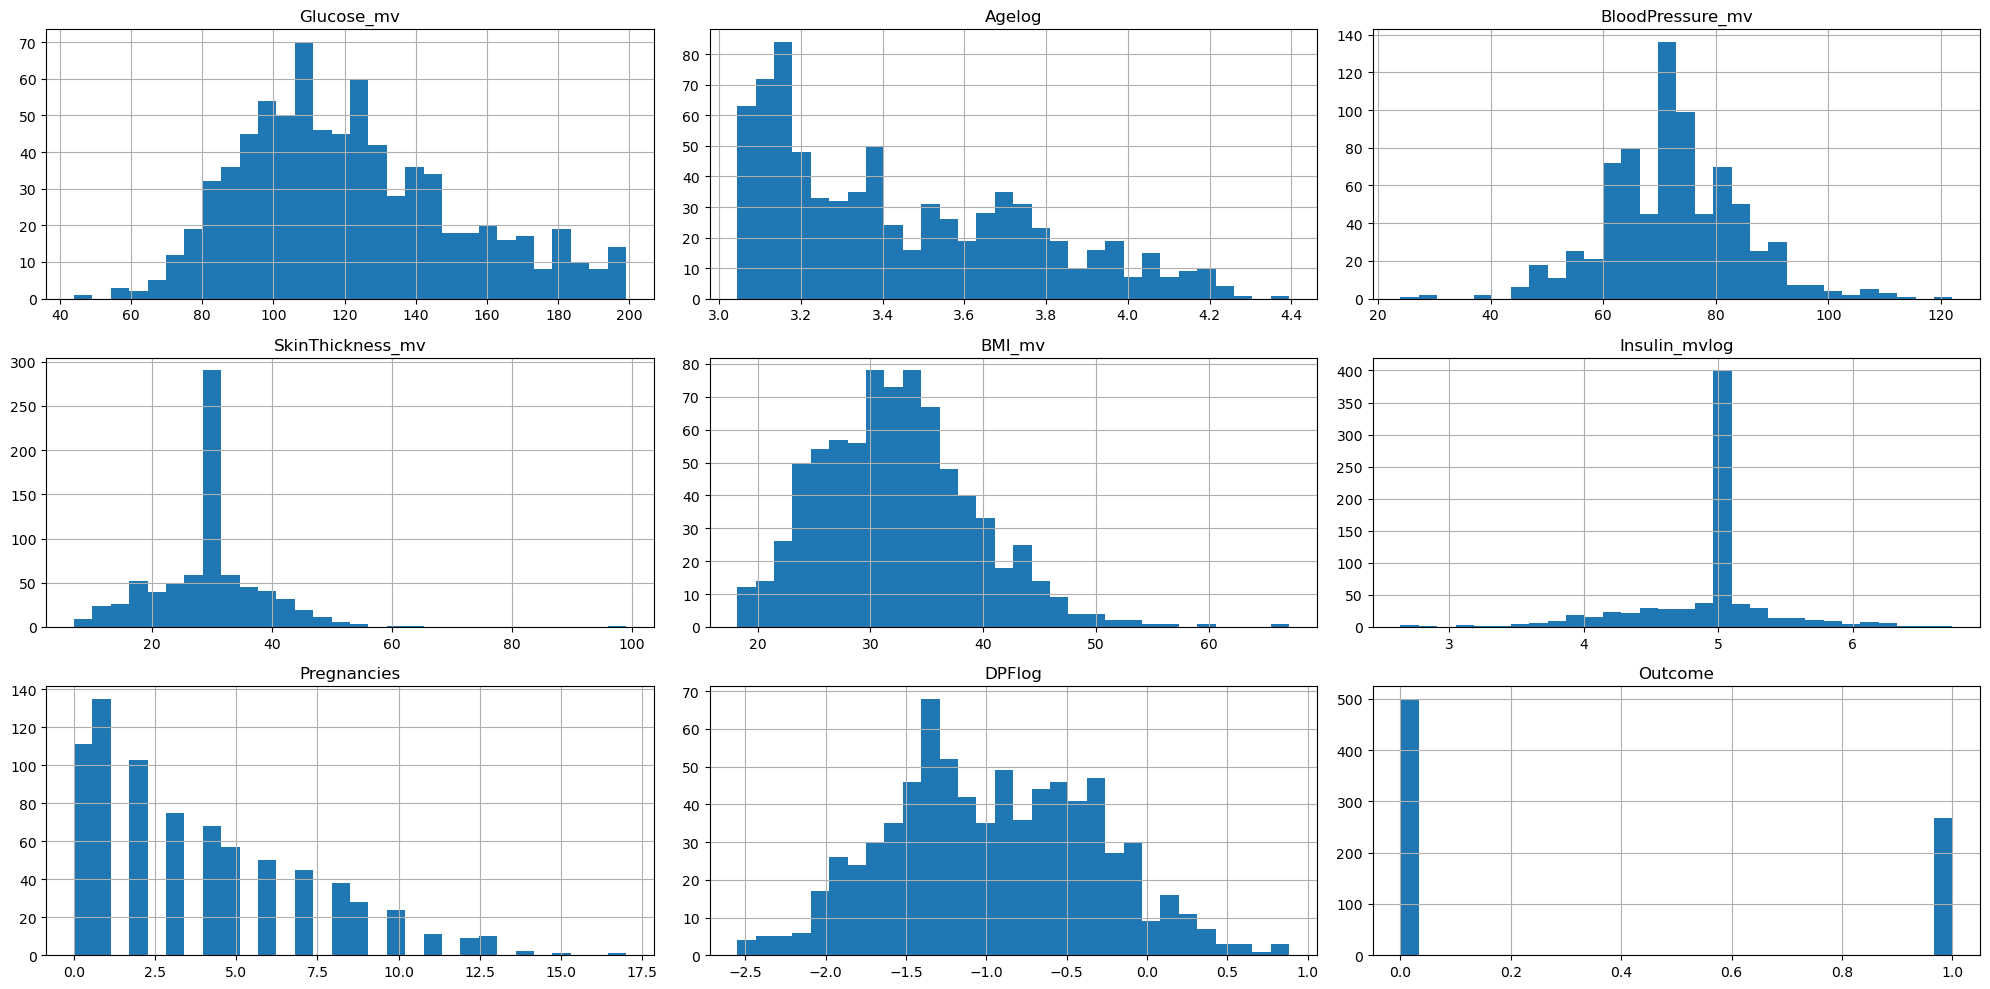

<Figure size 640x480 with 0 Axes>

In [74]:
graphing = df[['Glucose_mv','Agelog','BloodPressure_mv','SkinThickness_mv','BMI_mv','Insulin_mvlog','Pregnancies','DPFlog','Outcome',]]
graphing.hist(bins=30,figsize=(20, 10))
plt.tight_layout()
plt.show()
plt.savefig('eda_histograms.png')

Look at that. SkinThickness and Insulin had so many missing values that when they were replaced by the mean value, the counts of that mean value really messed with the shape of the data. Let's see if they are correleated with anything to excuse not using them in the dataset.

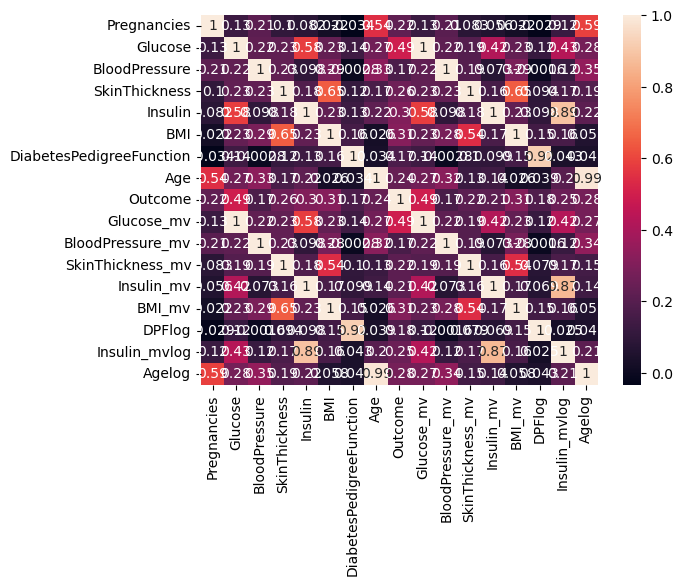

In [89]:
sns.heatmap(df.corr(), annot = True)
plt.show()

BMI and SkinThickness are positively correlated, Glucose and Insulin are positively correlated, and Age and Pregnancies are positively correlated, but none more than 65%. It makes sense then to drop Insuling and SkinThickness, as they have so many missing values all we could do is imput the data using some type of regression, and if they're correlated with other variables anyway, we might go ahead and drop them.
The only variable that appears to have a correlation with the Outcome variable is Glucose.

In [90]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_mv,BloodPressure_mv,SkinThickness_mv,Insulin_mv,BMI_mv,DPFlog,Insulin_mvlog,Agelog
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.00000,155.548223,33.6,-0.466809,5.046956,3.912023
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.00000,155.548223,26.6,-1.046969,5.046956,3.433987
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,29.15342,155.548223,23.3,-0.397497,5.046956,3.465736
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.00000,94.000000,28.1,-1.789761,4.543295,3.044522
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.00000,168.000000,43.1,0.827678,5.123964,3.496508


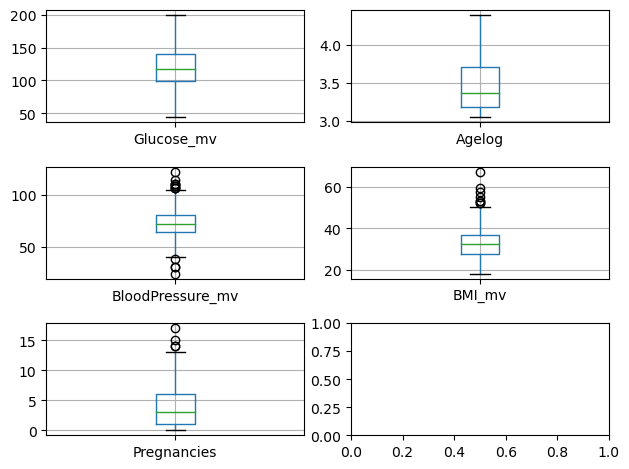

In [86]:
graphing2 = df[['Glucose_mv','Agelog','BloodPressure_mv','BMI_mv','Pregnancies','DPFlog']]

fig, axes = plt.subplots(3,2) #create figure and axes - 
                       
for i, el in enumerate(list(graphing2.columns.values)[:-1]):
    a = graphing2.boxplot(el, ax=axes.flatten()[i])

# fig.delaxes(axes[1,1]) #delete empty subplot
plt.tight_layout()  
plt.show()

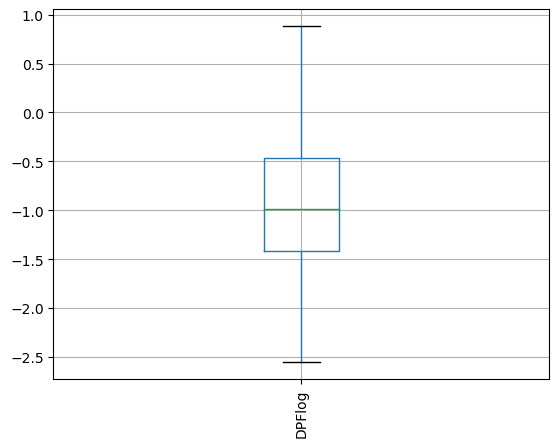

In [92]:
boxplot1 = graphing2[['DPFlog']]
boxplot1.boxplot()
plt.xticks(rotation=90)
plt.savefig('eda_boxplot.png')

Amazing! It doesn't look like we have any really worrying outliers in our data.

In [94]:
dff = df[['Glucose_mv','Agelog','BloodPressure_mv','BMI_mv','Pregnancies','DPFlog','Outcome']]
dff.head()

,Glucose_mv,Agelog,BloodPressure_mv,BMI_mv,Pregnancies,DPFlog,Outcome
0,148.0,3.912023,72.0,33.6,6,-0.466809,1
1,85.0,3.433987,66.0,26.6,1,-1.046969,0
2,183.0,3.465736,64.0,23.3,8,-0.397497,1
3,89.0,3.044522,66.0,28.1,1,-1.789761,0
4,137.0,3.496508,40.0,43.1,0,0.827678,1


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

I not only investigated the data in the previous step, but I've also addressed all the issues that would have needed attention in preprocessing and feature engineering. I think the data is ready to be modeled.

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

Lets prepare to split our data into training/testing. We'll shuffle it first for good practice.

In [98]:
X = dff[['Glucose_mv','Agelog','BloodPressure_mv','BMI_mv','Pregnancies','DPFlog']]
y = dff[['Outcome']]

X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')

Dataset has 768 data points and 6 features


Let's now split our data into 70% training and 30% testing.

In [99]:
train_ratio = 0.7

X_train, X_test = X[:int(train_ratio * len(X))], X[int(train_ratio * len(X)):]
y_train, y_test = y[:int(train_ratio * len(y))], y[int(train_ratio * len(y)):]

print(f'{len(X_train)} training samples and {len(X_test)} test samples')

537 training samples and 231 test samples


because we have an unbalanced number of Outcome=1 values, let's make sure they're not SUPER lopsided in our random split of the data.

In [102]:
y_train.describe()

,Outcome
count,537.000000
mean,0.342644
std,0.475036
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [103]:
y_test.describe()

,Outcome
count,231.000000
mean,0.363636
std,0.482090
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


This looks pretty good.
Time to train the data! We're going to use logistic regression.

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train[numeric_cols])

In [111]:
X = X_train[['Glucose_mv','Agelog','BloodPressure_mv','BMI_mv','Pregnancies','DPFlog']]
y = y_train['Outcome']
Xt = X_test[['Glucose_mv','Agelog','BloodPressure_mv','BMI_mv','Pregnancies','DPFlog']]
yt = y_test['Outcome']

In [164]:
logreg =  LogisticRegression(solver='liblinear') 

bestmodel = logreg.fit(X,y) 

y_pred=logreg.predict(Xt) 

y_pred 

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [165]:
print(bestmodel.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [120]:
cnf_matrix = metrics.confusion_matrix(yt, y_pred) 

cnf_matrix 

array([[131,  16],
       [ 38,  46]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

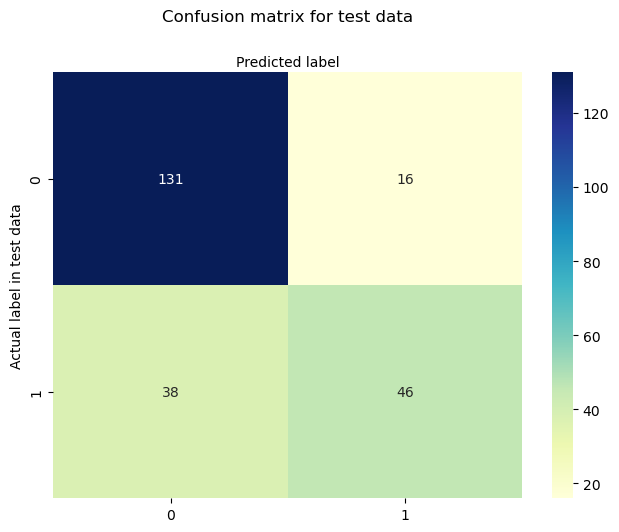

In [123]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix for test data', y=1.1) 

plt.ylabel('Actual label in test data') 

plt.xlabel('Predicted label')

In [122]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.7662337662337663
Precision: 0.7419354838709677
Recall: 0.5476190476190477


Okay, this is how our trained model performed on the test data. How did it perform itself?

In [126]:
y_predtrain=logreg.predict(X) 

y_predtrain 

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [128]:
cnf_matrix_train = metrics.confusion_matrix(y, y_predtrain) 

cnf_matrix_train 

array([[313,  40],
       [ 87,  97]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

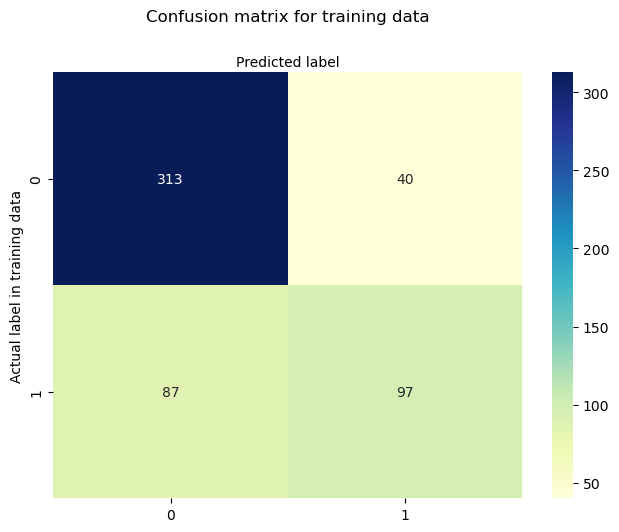

In [129]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix for training data', y=1.1) 

plt.ylabel('Actual label in training data') 

plt.xlabel('Predicted label')

In [131]:
print("Accuracy:",metrics.accuracy_score(y_train, y_predtrain)) 

print("Precision:",metrics.precision_score(y_train, y_predtrain)) 

print("Recall:",metrics.recall_score(y_train, y_predtrain)) 

Accuracy: 0.7635009310986964
Precision: 0.708029197080292
Recall: 0.5271739130434783


These both have a high rate of false negatives, but they perform similarly, which is a good sign that the data is not overfit. If we had more time, we could go to a polynomial logistic regression and use a higher-order predictive set to see if that would improve our model.

### Now, lets build our ensemble model to compare this with. Let's use K-nearest-neighbours, Random Forest and Logistic Regression

Start with K-nearest-neighbours

In [135]:
#create new k-nearest-neighbours model
knn = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)#fit model to training data
knn_gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [136]:
#save best model
knn_best = knn_gs.best_estimator_#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 12}


Continue to Random Forest

In [140]:
rf = RandomForestClassifier()#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)#fit model to training data
rf_gs.fit(X, y)
#save best model
rf_best = rf_gs.best_estimator_#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 50}


And, lastly, another logistic regression - for fun!!

In [149]:
#create a new logistic regression model - I tried other solvers, but they weren't as good as liblinear and I wanted a fair comparison
log_reg = LogisticRegression(solver='liblinear')#fit the model to the training data
log_reg.fit(X, y)

LogisticRegression(solver='liblinear')

In [150]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(Xt, yt)))
print('rf: {}'.format(rf_best.score(Xt, yt)))
print('log_reg: {}'.format(log_reg.score(Xt, yt)))

knn: 0.7359307359307359
rf: 0.7532467532467533
log_reg: 0.7662337662337663


Now, lets put these models together with a voting classifier

In [154]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [156]:
#fit model to training data
ensemble.fit(X, y)#test our model on the test data
ensemble.score(Xt, yt)

0.7532467532467533

Our ensemble model was super fancy, but it wasn't as accurate as our original logistic regression when using the test data. So, combining all these models together actually decreased the performance of our model!

In [160]:
y_prede = ensemble.predict(Xt)
print('Predicted Value for the Ensemble model is : ' , y_prede)

Predicted Value for the Ensemble model is :  [1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 1 0 0 0 1 0]


In [161]:
cnf_matrix_ensemble = metrics.confusion_matrix(yt, y_prede) 

cnf_matrix_ensemble 

array([[129,  18],
       [ 39,  45]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

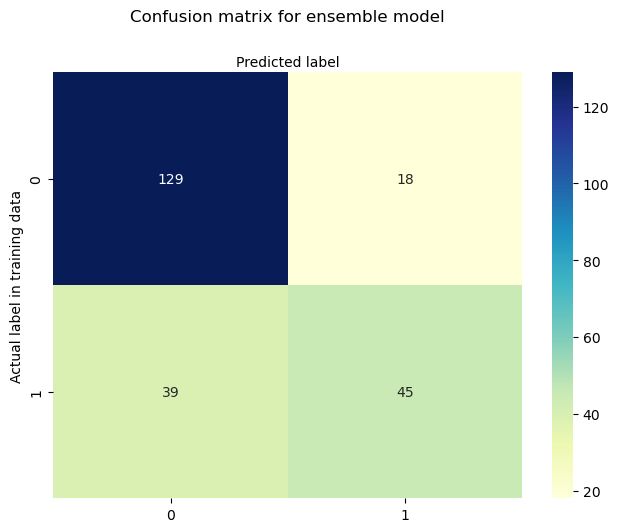

In [163]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix_ensemble), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix for ensemble model', y=1.1) 

plt.ylabel('Actual label in training data') 

plt.xlabel('Predicted label')

This confirms it, this model is not an improvement over the original logistic regression model on its own.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- SkinThickness and Insulin both had many missing values, and were over 50% correlated with BMI and Glucose, respectively, so they were dropped.
- The logistic regression performed similarly and reasonably well on both the training and test data (0.766 vs 0.763 accuracy, respectively)
- The ensemble method did not improve accuracy on the training data (0.753)
- There was a high rate of false negatives in the models, which would call for adjustment in a clinical setting at the expense of a corresponding and probably inevitable shift toward false positive results, which are currently low. Ensemble methods did not improve this performance.